In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from colloids import track


Bad key "scatter.edgecolors" on line 611 in
/Users/yushi/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


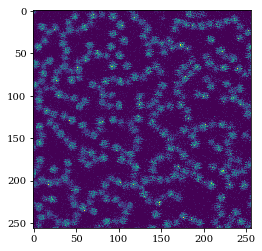

In [2]:
fn = '0_5_Efield_nosalt_27_11_20.tif'

img_obj = Image.open(fn)
zxy = []

for i in range(img_obj.n_frames):
    img_obj.seek(i)
    zxy.append(np.array(img_obj.convert('L')))
zxy = np.array(zxy)
xyz = np.moveaxis(zxy, 0, -1)

xyz = xyz[:256, :256, :]  # take only a fraction

plt.imshow(xyz[:, :, 5])
plt.show()

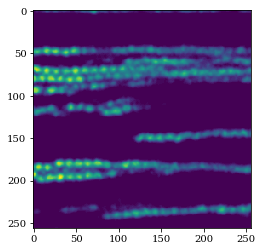

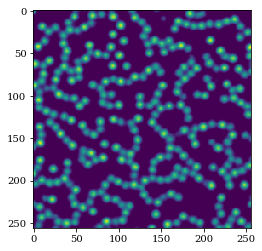

In [3]:
img = ndimage.median_filter(xyz, 3)
img = ndimage.gaussian_filter(img, 1)

plt.imshow(img[5])
plt.show()
plt.imshow(img[:, :, 5])
plt.show()

In [4]:
finder = track.MultiscaleBlobFinder(shape=img.shape, Octave0=False)

In [5]:
features = finder(img)

/Users/yushi/.colloids/lib/python2.7/site-packages/scipy/ndimage/measurements.py:429: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


In [6]:
features.shape

(4146, 5)

In [7]:
import nplocate as nl

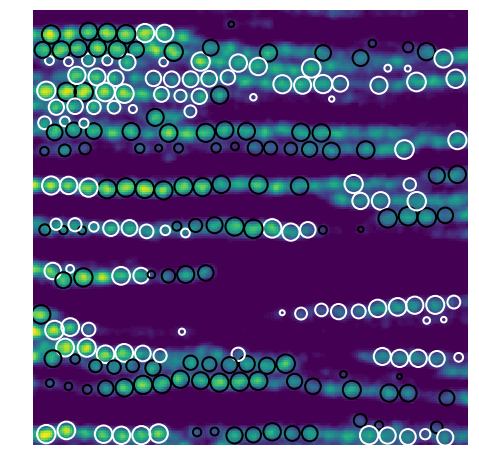

In [8]:
mask = features[:, 4] < 0  # remove particles that are not gaussian like
nl.see_slice(img.T, features[:, :3], s=40, radius=5.5, axis=1)

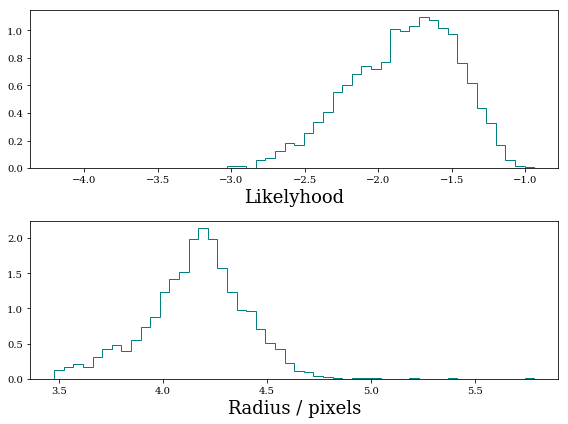

In [9]:
plt.subplot(211).hist(features[:, 4], bins=50, histtype='step', color='teal', density=True)
plt.xlabel('Likelyhood', fontsize=18)
plt.subplot(212).hist(features[:, 3], bins=50, histtype='step', color='teal', density=True)
plt.xlabel('Radius / pixels', fontsize=18)
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.show()

In [10]:
diameter = np.mean(features[:, 3]) * 2
diameter = 12
gr = nl.get_gr(positions=features[:, :3], cutoff=diameter * 5, bins=50)

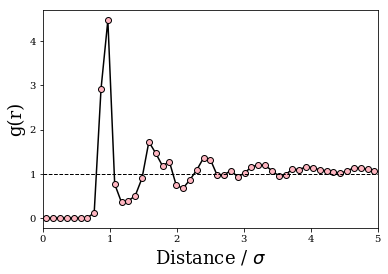

In [11]:
plt.plot(gr[0] / diameter, gr[1], color='k', marker='o', mfc='lightpink')
plt.plot((0, 5), (1, 1), color='k', lw=1, ls='--')
plt.xlim(0, 5)
plt.xlabel('Distance / $\sigma$', fontsize=18)
plt.ylabel('g(r)', fontsize=18)
plt.show()

In [18]:
d_measure = gr[0][np.argmax(gr[1])]

x = 4/3 * np.pi * (d_measure / 2)**3 / (img.shape[0] - d_measure)**3 * features.shape[0]

print('{x:.04} %'.format(x=x * 100))

17.56 %
